In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import talib

# Introduction to stock selection method

We use **Mark Minervini's Trend Template**, which is a technical stock selection method proposed by a legendary investor abroad. The core idea is to measure stock momentum through **technical indicators**, select the stocks with the most potential, and buy and hold them.

### MM trend model
1.	Stock prices are above their 150-day and 200-day moving averages
2.	The 150 moving average is above the 200 moving averages
3.	The 200-day moving average has risen for at least 1 month
4.	The 50 moving average is above the 150 and 200 moving average
5.	Stock prices are above their 50-day moving average
6.	The stock is 30 percent above its 52-week low
7.	Stock prices are within 25 percent of their 52-week high
8.	The relative strength index (RS) is greater than or equal to 70

# Data preparation

In [2]:
data = pd.read_csv('nasdaq_d_2012_2022.csv',header='infer',usecols=["date","open","high","low","close","adjcp","volume","tic","day"])
data

,date,open,high,low,close,adjcp,volume,tic,day
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575917,302220800.0,AAPL,1
1,2012-01-03,28.700001,29.010000,28.510000,28.570000,28.570000,4495100.0,ADBE,1
2,2012-01-03,36.459999,36.709999,35.910000,36.029999,28.122229,3021500.0,ADI,1
3,2012-01-03,48.191395,48.279194,47.761192,47.813873,37.314682,2898755.0,ADP,1
4,2012-01-03,31.219999,31.830000,30.770000,30.809999,30.809999,2684000.0,ADSK,1
...,...,...,...,...,...,...,...,...,...
232404,2021-12-31,51.900002,52.419998,51.830002,52.160000,51.639816,3406700.0,WBA,4
232405,2021-12-31,275.519989,277.290009,272.799988,273.179993,273.179993,754300.0,WDAY,4
232406,2021-12-31,67.440002,67.980003,66.419998,67.699997,67.230995,5704600.0,XEL,4
232407,2021-12-31,189.199997,191.610992,183.619995,183.910004,183.910004,2817400.0,ZM,4


In [3]:
data = data.pivot(index="date",columns="tic", values="adjcp").fillna(method="ffill") # transform to the standard format
data = data.loc['2012-12-31':] # select data from 2012-12-31 to 2021-12-31 for easier explanation
data

tic,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,ZM,ZS
date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,16.418943,NaN,37.680000,33.865601,40.330193,35.349998,30.618542,27.750000,9.843574,2.400000,...,6.774000,24.179976,49.908463,38.820000,41.900002,28.764887,54.500000,19.798002,NaN,NaN
2013-01-02,16.939116,NaN,38.340000,35.427631,41.364471,36.939999,31.314425,28.400000,10.187757,2.530000,...,7.072000,25.291519,51.876602,39.849998,43.650002,29.580967,52.910000,20.294630,NaN,NaN
2013-01-03,16.725311,NaN,37.750000,34.855961,41.527405,36.369999,31.292883,29.170000,10.161942,2.490000,...,6.954000,24.962751,52.473896,40.029999,45.150002,29.371119,52.299999,20.235325,NaN,NaN
2013-01-04,16.259426,NaN,38.130001,34.235981,41.895779,36.360001,31.242672,29.309999,10.161942,2.590000,...,6.880000,24.907957,52.385773,40.040001,45.849998,28.897017,52.189999,20.309450,NaN,NaN
2013-01-07,16.163786,NaN,37.939999,34.340652,41.732845,36.090000,31.113552,28.940001,10.041476,2.670000,...,6.868000,24.986238,52.150764,40.060001,47.290001,29.557650,52.169998,20.094498,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.100540,171.679993,577.679993,174.617828,245.068527,284.299988,86.326981,661.070007,162.427139,154.360001,...,1093.939941,190.577957,227.022751,252.000000,222.339996,50.224075,279.350006,66.357094,187.440002,329.890015
2021-12-28,179.061859,169.710007,569.359985,173.533127,244.849625,282.769989,87.447205,656.369995,159.352692,153.149994,...,1088.469971,189.842850,227.691605,252.410004,221.929993,50.917095,275.799988,67.151550,183.770004,324.660004
2021-12-29,179.151749,167.440002,569.289978,174.667587,246.779999,282.570007,87.814011,653.340027,160.690277,148.259995,...,1086.189941,189.554749,228.909531,255.929993,223.320007,51.728916,275.750000,67.489197,181.809998,323.179993


# Data description

plot the close price data for the 100 series

<AxesSubplot:xlabel='date'>

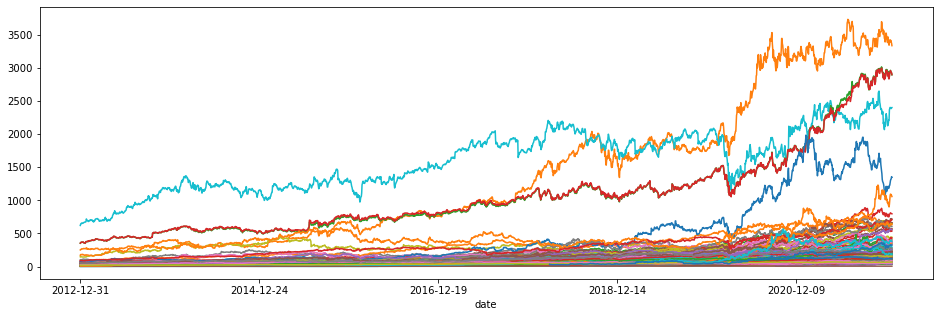

In [4]:
plt.rcParams['figure.figsize'] = (16, 5) 
adj_c = data[[i for i in data.columns]]
adj_c.plot(legend = False)

plot the simple return 

<AxesSubplot:xlabel='date'>

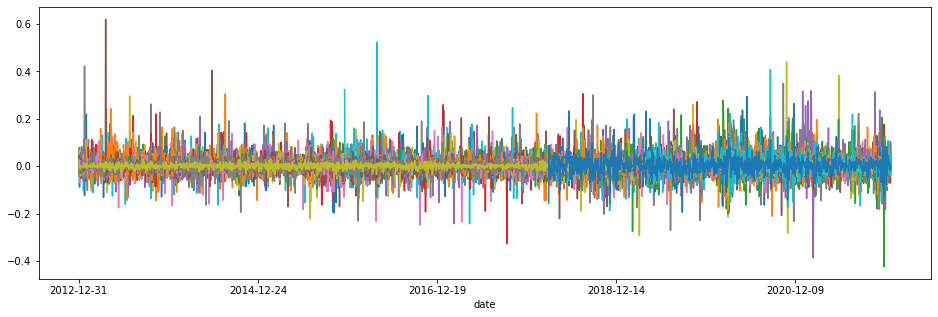

In [5]:
s_r = (adj_c-adj_c.shift(periods=1))/adj_c.shift(periods=1)
s_r.plot(legend = False)

plot the continuous return

<AxesSubplot:xlabel='date'>

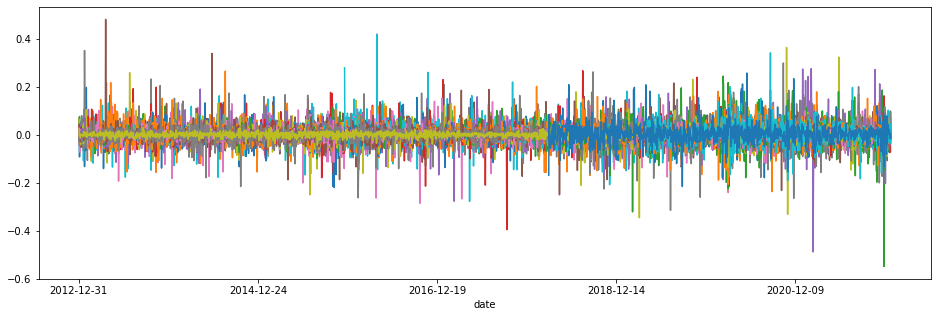

In [6]:
c_r = np.log(adj_c/adj_c.shift(periods = 1)) 
c_r.plot(legend = False)

# Stock selecting

the NASDAQ index

In [7]:
hisdata = pd.read_csv('HistoricalData.csv',header='infer',usecols=["日期","收盘价/最新价"],index_col=0)
hisdata.columns=['close']
hisdata.index = pd.to_datetime(hisdata.index)
hisdata = hisdata.loc['2021-12-31':'2012-12-31'].sort_index(ascending=True)
hisdata

,close
日期,
2012-12-31,2660.93
2013-01-01,2660.93
2013-01-02,2746.47
2013-01-03,2732.26
2013-01-04,2724.49
...,...
2021-12-27,16567.50
2021-12-28,16488.66
2021-12-29,16491.01


historical cumulative return rate of the NASDAQ index

In [8]:
benchmark_ret = hisdata.close.pct_change(len(hisdata)-1).iloc[-1]
benchmark_ret

5.133224098341557

MM stock selection model

In [9]:
def screen(close: pd.Series, benchmark_ret: float) -> pd.Series:
    """ realize the logic of MM stock selection model, evaluate whether a single stock meets the screening conditions
        The Args
        Close (pd.series): stock closing price, default time Series index
        Benchmark_ret (float): Benchmark index yield, used to calculate relative strength
    """
    # Calculate the 50,150,200 moving average
    ema_50 = talib.EMA(close, 50).iloc[-1]
    ema_150 = talib.EMA(close, 150).iloc[-1]
    ema_200 = talib.EMA(close, 200).iloc[-1]
 
    # The 20-day moving average of the 200-day moving average, used to determine whether the 200-day moving average is rising
    ema_200_smooth = talib.EMA(talib.EMA(close, 200), 20).iloc[-1]
 
    # 52-week high and 52-week low for the close
    high_52week = close.rolling(52 * 5).max().iloc[-1]
    low_52week = close.rolling(52 * 5).min().iloc[-1]
 
    # Latest closing price
    cl = close.iloc[-1]
 
    # Condition 1：The close is above the 150 and 200 moving averages
    if cl > ema_150 and cl > ema_200:
        condition_1 = True
    else:
        condition_1 = False
 
    # Condition 2：The 150 average is above the 200 average
    if ema_150 > ema_200:
        condition_2 = True
    else:
        condition_2 = False
 
    # Condition 3：The 200-day moving average rose by 1 month
    if ema_200 > ema_200_smooth:
        condition_3 = True
    else:
        condition_3 = False
 
    # Condition 4：The 50 moving average is above the 150 and 200 moving average
    if ema_50 > ema_150 and ema_50 > ema_200:
        condition_4 = True
    else:
        condition_4 = False
 
    # Condition 5：The close is above its 50-day moving average
    if cl > ema_50:
        condition_5 = True
    else:
        condition_5 = False
 
    # Condition 6：The close is 30 percent above its 52-week low
    if cl >= low_52week * 1.3:
        condition_6 = True
    else:
        condition_6 = False
 
    # Condition 7：The close is within 25 percent of its 52-week high
    if cl >= high_52week * 0.75 and cl <= high_52week * 1.25:
        condition_7 = True
    else:
        condition_7 = False
 
    # Condition 8：RS is greater than or equal to 70
    rs = close.pct_change(len(data)-1).iloc[-1] / benchmark_ret * 100
    if rs >= 70:
        condition_8 = True
    else:
        condition_8 = False
 
    # Determine if the stock meets the criteria
    if (condition_1 and condition_2 and condition_3 and
        condition_4 and condition_5 and condition_6 and
        condition_7 and condition_8):
        meet_criterion = True
    else:
        meet_criterion = False
 
    out = {
        "rs": round(rs, 2),
        "close": cl,
        "ema_50": ema_50,
        "ema_150": ema_150,
        "ema_200": ema_200,
        "high_52week": high_52week,
        "low_52week": low_52week,
        "meet_criterion": meet_criterion
    }
 
    return pd.Series(out)

# Result

In [12]:
results = data.apply(screen, benchmark_ret=benchmark_ret)
results = results.T.query("meet_criterion == True").sort_values("rs", ascending=False)
results[:20]

,rs,close,ema_50,ema_150,ema_200,high_52week,low_52week,meet_criterion
tic,,,,,,,,
TSLA,3019.65,1056.78,1008.55,873.102,822.397,1229.91,563,True
NVDA,2002.3,294.06,286.031,240.268,224.041,333.662,115.812,True
AMD,1148.56,143.9,138.894,118.981,112.518,161.91,73.09,True
AVGO,494.65,660.941,584.485,521.495,502.022,669.751,406.354,True
ALGN,441.87,657.18,647.672,635.959,618.24,729.92,496.07,True
LRCX,416.41,716.85,657.083,614.177,596.284,724.426,465.383,True
FTNT,313.6,359.4,332.416,295.978,278.481,367.67,138.11,True
ODFL,292,358.038,342.787,306.852,292.792,363.652,189.956,True
AMAT,291.38,157.077,148.789,138.211,132.862,162.427,83.2867,True


Finally, we select 35 of total 100 stocks

In [13]:
len(results)

35

In [15]:
results[:20].index

Index(['TSLA', 'NVDA', 'AMD', 'AVGO', 'ALGN', 'LRCX', 'FTNT', 'ODFL', 'AMAT',
       'MSFT', 'MU', 'IDXX', 'KLAC', 'CDNS', 'MRVL', 'ASML', 'FB', 'CTAS',
       'INTU', 'SNPS'],
      dtype='object', name='tic')